# Clustering Image by CMYK Percentage

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sys
import os

sys.path.append(os.path.abspath('..'))
from src.helper import prepend_zero

In [4]:
df = pd.read_csv("../datasets/cmyk-by-dpi.csv")
df = df[df['dpi']==300]
df

,page,dpi,processing_time,c,m,y,k
0,1,300,0.994093,3.03,0.10,8.37,6.49
1,2,300,0.953240,1.03,0.11,1.82,4.19
2,3,300,0.970992,2.51,0.05,7.04,4.96
3,4,300,0.913363,4.33,0.09,11.94,6.93
4,5,300,0.914908,4.21,0.10,11.81,7.30
...,...,...,...,...,...,...,...
847,848,300,0.889882,4.29,0.09,11.92,7.02
848,849,300,0.899180,3.47,0.10,9.55,6.16
849,850,300,0.891959,2.49,0.10,6.96,5.26
850,851,300,0.902019,1.04,0.08,1.81,3.93


In [5]:
df.drop(['page', 'dpi', 'processing_time'], axis=1, inplace=True)
df

,c,m,y,k
0,3.03,0.10,8.37,6.49
1,1.03,0.11,1.82,4.19
2,2.51,0.05,7.04,4.96
3,4.33,0.09,11.94,6.93
4,4.21,0.10,11.81,7.30
...,...,...,...,...
847,4.29,0.09,11.92,7.02
848,3.47,0.10,9.55,6.16
849,2.49,0.10,6.96,5.26
850,1.04,0.08,1.81,3.93


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.23, random_state=10)

ValueError: not enough values to unpack (expected 4, got 2)

In [11]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled

array([[ 0.00324428, -0.09500925,  0.12239404,  0.18962658],
       [-0.4885926 , -0.08650007, -1.04239478, -0.5210651 ],
       [-0.12463331, -0.13755518, -0.11412033, -0.28313789],
       ...,
       [-0.12955168, -0.09500925, -0.12834676, -0.19043897],
       [-0.48613341, -0.11202762, -1.04417309, -0.60140416],
       [-0.65335795, -0.08650007, -1.22733835, -0.15644937]])

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

/Users/rasyidev/miniconda/envs/print-cost/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
kmeans.labels_

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,

In [14]:
df['label'] = kmeans.labels_
df

,c,m,y,k,label
0,3.03,0.10,8.37,6.49,2
1,1.03,0.11,1.82,4.19,0
2,2.51,0.05,7.04,4.96,2
3,4.33,0.09,11.94,6.93,2
4,4.21,0.10,11.81,7.30,2
...,...,...,...,...,...
847,4.29,0.09,11.92,7.02,2
848,3.47,0.10,9.55,6.16,2
849,2.49,0.10,6.96,5.26,2
850,1.04,0.08,1.81,3.93,0


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [16]:
df[df['label'] == 1]

,c,m,y,k,label
40,4.58,9.84,27.93,19.08,1
167,35.85,1.92,34.80,29.92,1
225,13.70,6.06,23.71,19.32,1
234,8.54,23.52,49.03,13.51,1
253,17.98,1.22,31.81,21.43,1
360,35.05,1.21,33.68,25.84,1
361,22.29,2.75,39.68,24.36,1
426,14.16,3.95,28.25,14.77,1
451,8.47,16.48,40.83,11.78,1
502,16.80,5.93,20.54,16.24,1


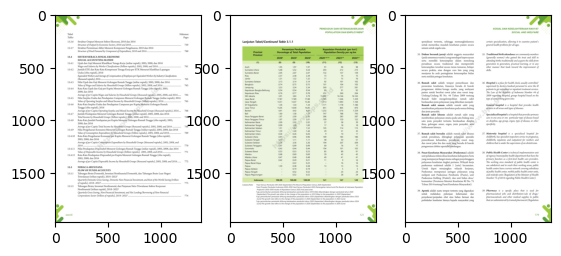

In [23]:
# read images
img_A = mpimg.imread('../outputs/pdfium_200dpi/page-040.jpg')
img_B = mpimg.imread('../outputs/pdfium_200dpi/page-167.jpg')

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(mpimg.imread('../outputs/pdfium_200dpi/page-225.jpg'))

In [17]:
df[df['label'] == 1].index

Index([ 40, 167, 225, 234, 253, 360, 361, 426, 451, 502, 539, 663, 670, 757,
       835, 839, 841],
      dtype='int64')

In [24]:
test = df['c'] + df['m'] + df['y'] + df['k']
test

0      17.99
1       7.15
2      14.56
3      23.29
4      23.42
       ...  
847    23.32
848    19.28
849    14.81
850     6.86
851     6.62
Length: 852, dtype: float64

In [25]:
df2 = df[['c','m', 'y', 'k']]
df2['sum'] = test
df2

,c,m,y,k,sum
0,3.03,0.10,8.37,6.49,17.99
1,1.03,0.11,1.82,4.19,7.15
2,2.51,0.05,7.04,4.96,14.56
3,4.33,0.09,11.94,6.93,23.29
4,4.21,0.10,11.81,7.30,23.42
...,...,...,...,...,...
847,4.29,0.09,11.92,7.02,23.32
848,3.47,0.10,9.55,6.16,19.28
849,2.49,0.10,6.96,5.26,14.81
850,1.04,0.08,1.81,3.93,6.86


In [26]:
df2_norm = sc.fit_transform(df2)

In [27]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(df2_norm)

/Users/rasyidev/miniconda/envs/print-cost/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
kmeans2.labels_

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,